In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#from sklearn.model_selection import ParameterGrid
from sklearn.compose import ColumnTransformer
#from sklearn.metrics import silhouette_score
#from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

## Importing and Standardizing the Song Data

In [2]:
#import our liked songs data to pandas df
liked_songs_df = pd.read_csv('/Users/jpate/Documents/MySongsDataset.csv')
#liked_songs_df.head(20)

In [3]:
songs_normalized_df = liked_songs_df.copy()
selected_columns = songs_normalized_df[['danceability',
                                        'energy',
                                        'loudness',
                                        'speechiness',
                                        'acousticness',
                                        'tempo',
                                        'liveness',
                                        'valence',
                                        'mode']]

In [4]:
selected_columns

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,0.836,0.741,-7.343,0.0465,0.021900,126.041,0.2590,0.559,1
1,0.618,0.605,-8.471,0.0397,0.023400,107.978,0.1180,0.204,0
2,0.668,0.856,-6.386,0.0453,0.083700,79.008,0.0960,0.737,0
3,0.649,0.717,-5.170,0.0544,0.006300,125.001,0.1600,0.305,1
4,0.763,0.665,-9.063,0.0807,0.122000,126.025,0.4760,0.422,0
...,...,...,...,...,...,...,...,...,...
281,0.261,0.592,-4.665,0.0317,0.045100,139.242,0.2540,0.329,1
282,0.573,0.590,-8.430,0.0557,0.667000,108.789,0.6910,0.364,1
283,0.746,0.597,-5.780,0.0810,0.257000,80.034,0.0766,0.381,1
284,0.688,0.671,-7.872,0.0975,0.030400,83.988,0.0782,0.537,1


In [5]:
selected_columns = StandardScaler().fit_transform(selected_columns)

In [6]:
selected_columns_df = pd.DataFrame(selected_columns)

In [7]:
selected_columns_df

,0,1,2,3,4,5,6,7,8
0,1.545713,0.602294,0.160835,-0.441856,-0.810269,0.149141,0.539636,0.662590,0.814120
1,0.310664,0.068414,-0.058472,-0.527526,-0.805893,-0.454782,-0.453308,-0.939382,-1.228321
2,0.593932,1.053736,0.346895,-0.456974,-0.629976,-1.423372,-0.608235,1.465832,-1.228321
3,0.486290,0.508080,0.583310,-0.342328,-0.855780,0.114369,-0.157537,-0.483610,0.814120
4,1.132142,0.303949,-0.173568,-0.010986,-0.518241,0.148606,2.067784,0.044364,-1.228321
...,...,...,...,...,...,...,...,...,...
281,-1.711871,0.017381,0.681492,-0.628314,-0.742586,0.590506,0.504425,-0.375308,0.814120
282,0.055723,0.009530,-0.050500,-0.325950,1.071725,-0.427667,3.581847,-0.217367,0.814120
283,1.035830,0.037009,0.464714,-0.007207,-0.124396,-1.389068,-0.744853,-0.140653,0.814120
284,0.707239,0.327503,0.057986,0.200669,-0.785472,-1.256869,-0.733586,0.563312,0.814120


In [8]:
normed_features_df = selected_columns_df.rename(columns={0: 'danceability',
                                                         1: 'energy',
                                                         2: 'loudness',
                                                         3:'speechiness',
                                                         4: 'acousticness',
                                                         5: 'tempo',
                                                         6: 'liveness',
                                                         7: 'valence',
                                                         8: 'mode'})

In [9]:
normed_features_df

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,1.545713,0.602294,0.160835,-0.441856,-0.810269,0.149141,0.539636,0.662590,0.814120
1,0.310664,0.068414,-0.058472,-0.527526,-0.805893,-0.454782,-0.453308,-0.939382,-1.228321
2,0.593932,1.053736,0.346895,-0.456974,-0.629976,-1.423372,-0.608235,1.465832,-1.228321
3,0.486290,0.508080,0.583310,-0.342328,-0.855780,0.114369,-0.157537,-0.483610,0.814120
4,1.132142,0.303949,-0.173568,-0.010986,-0.518241,0.148606,2.067784,0.044364,-1.228321
...,...,...,...,...,...,...,...,...,...
281,-1.711871,0.017381,0.681492,-0.628314,-0.742586,0.590506,0.504425,-0.375308,0.814120
282,0.055723,0.009530,-0.050500,-0.325950,1.071725,-0.427667,3.581847,-0.217367,0.814120
283,1.035830,0.037009,0.464714,-0.007207,-0.124396,-1.389068,-0.744853,-0.140653,0.814120
284,0.707239,0.327503,0.057986,0.200669,-0.785472,-1.256869,-0.733586,0.563312,0.814120


In [10]:
songs_normalized_df = songs_normalized_df.drop(['id',
                                                'danceability',
                                                'energy',
                                                'loudness',
                                                'speechiness',
                                                'acousticness',
                                                'tempo',
                                                'liveness',
                                                'valence',
                                                'mode'],
                                                   axis=1)

In [11]:
songs_normalized_df

,name,artist,jacoborgina
0,Nobody,B.R.T,0
1,Kingdom Come,Rebecca St. James,0
2,Fire In The Sky,Anderson .Paak,0
3,Life After You,Sunnery James & Ryan Marciano,0
4,Deep End - SIDEPIECE Remix,John Summit,0
...,...,...,...
281,You Be The Anchor That Keeps My Feet On The Gr...,Mayday Parade,1
282,Where Did You Sleep Last Night,Nirvana,1
283,"Nobody, Not Even the Rain",La Dispute,1
284,American Woman,Lenny Kravitz,1


In [12]:
songs_data = songs_normalized_df.join(normed_features_df)

In [13]:
songs_data.drop(['name',
                'artist'],
                axis=1)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,0,1.545713,0.602294,0.160835,-0.441856,-0.810269,0.149141,0.539636,0.662590,0.814120
1,0,0.310664,0.068414,-0.058472,-0.527526,-0.805893,-0.454782,-0.453308,-0.939382,-1.228321
2,0,0.593932,1.053736,0.346895,-0.456974,-0.629976,-1.423372,-0.608235,1.465832,-1.228321
3,0,0.486290,0.508080,0.583310,-0.342328,-0.855780,0.114369,-0.157537,-0.483610,0.814120
4,0,1.132142,0.303949,-0.173568,-0.010986,-0.518241,0.148606,2.067784,0.044364,-1.228321
...,...,...,...,...,...,...,...,...,...,...
281,1,-1.711871,0.017381,0.681492,-0.628314,-0.742586,0.590506,0.504425,-0.375308,0.814120
282,1,0.055723,0.009530,-0.050500,-0.325950,1.071725,-0.427667,3.581847,-0.217367,0.814120
283,1,1.035830,0.037009,0.464714,-0.007207,-0.124396,-1.389068,-0.744853,-0.140653,0.814120
284,1,0.707239,0.327503,0.057986,0.200669,-0.785472,-1.256869,-0.733586,0.563312,0.814120


In [14]:
#shuffle
songs_data = songs_data.sample(frac=1).reset_index(drop=True)

In [15]:
songs_data

,name,artist,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,Lake Of Fire,Nirvana,1,-0.125569,0.119447,-0.288082,1.227449,-0.066049,0.798534,1.624128,1.208614,-1.228321
1,Hark! The Herald Angels Sing,Jeremy Camp,1,-0.454160,1.191132,0.434384,-0.165948,-0.873780,-0.286574,-0.509645,0.265481,0.814120
2,Come & Get It,Selena Gomez,0,-0.097242,0.782871,0.791340,-0.376344,-0.844694,-1.390907,-0.714572,0.725766,-1.228321
3,Genetics,Meghan Trainor,0,1.273776,0.610145,0.089288,3.104630,-0.791306,0.014200,1.110050,0.048876,0.814120
4,Whom Shall I Fear (God Of Angel Armies),Chris Tomlin,0,-0.675109,0.747540,0.998009,-0.619495,-0.725374,0.884795,0.610057,0.035339,0.814120
...,...,...,...,...,...,...,...,...,...,...,...,...
281,Cannot Stop Me,Justin Stone,1,0.888531,0.107670,-0.141684,-0.344847,-0.685114,-0.318704,-0.044863,-0.537761,-1.228321
282,Rise Above It,I Prevail,1,-0.012262,0.778945,0.229465,-0.652251,-0.870338,0.616418,0.546678,-1.450659,0.814120
283,Nobody,B.R.T,0,1.545713,0.602294,0.160835,-0.441856,-0.810269,0.149141,0.539636,0.662590,0.814120
284,Have Yourself A Merry Little Christmas,Jeremy Camp,1,-0.907389,-1.462564,-1.059348,-0.672409,1.404305,-1.622239,-0.580067,-1.496688,0.814120


In [16]:
songs_data.to_csv('/Users/jpate/Documents/normsongs.csv')

## Starting the Random Forest Process

In [17]:
train = pd.read_csv('/Users/jpate/Documents/normsongs.csv')

In [18]:
print(train.shape)

(286, 13)


In [19]:
train = train.drop(['Unnamed: 0',
            'name',
            'artist'],
            axis=1)

In [20]:
train.sample(frac=1).reset_index(drop=True)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,1,-0.578798,1.214685,0.814281,0.131377,-0.850208,1.455283,-0.604714,-0.244442,-1.228321
1,0,-0.182223,0.343205,0.950570,3.129827,-0.521158,1.884779,1.018502,1.745613,0.814120
2,1,1.613697,0.617996,0.995092,1.756587,-0.597301,0.516349,-0.723727,0.468548,-1.228321
3,0,-0.272868,-0.704926,-0.736804,1.416427,0.444491,2.146035,-0.804007,2.269074,0.814120
4,1,-0.074581,-0.881578,0.164140,-0.604377,0.683715,0.012027,-0.382886,-0.569349,0.814120
...,...,...,...,...,...,...,...,...,...,...
281,0,0.418306,-0.897280,-0.324827,-0.618235,0.855840,-0.352105,-0.523730,-1.219163,-1.228321
282,0,0.712905,-0.979717,0.104258,-0.235240,0.144002,0.215040,-0.827246,0.703203,-1.228321
283,0,1.426741,-0.273112,0.306455,0.102400,-0.223587,1.013416,-0.551898,2.097595,-1.228321
284,0,-0.442829,0.319652,0.626083,-0.604377,-0.640187,0.415512,1.687507,0.333170,0.814120


In [21]:
labels = train.pop('jacoborgina')

In [43]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, stratify=labels)

In [44]:
rf = RandomForestClassifier(random_state=0, max_depth = 80, n_estimators = 35)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=35, random_state=0)

In [45]:
y_pred = rf.predict(x_test)

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7916666666666666

In [ ]:
## Experimenting with Feature Importances

In [27]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


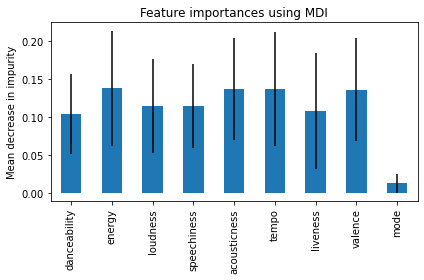

In [31]:
forest_importances = pd.Series(importances, index=train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

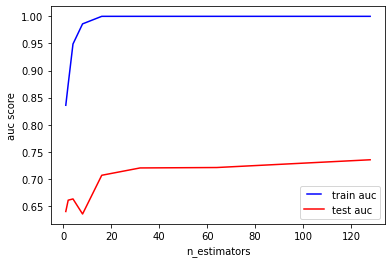

In [40]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, max_depth = 80, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label="train auc")
line2, = plt.plot(n_estimators, test_results, 'r', label="test auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("auc score")
plt.xlabel("n_estimators")
plt.show()

## Starting the K-Nearest Neighbor Process

In [45]:
train = pd.read_csv('/Users/jpate/Documents/normsongs.csv')

In [46]:
train = train.drop(['Unnamed: 0',
            'name',
            'artist'],
            axis=1)

In [47]:
train.sample(frac=1).reset_index(drop=True)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,1,1.047161,0.633698,0.438272,5.473154,-0.459893,-1.052853,-0.782177,1.113849,-1.228321
1,1,0.123707,-0.595010,-0.114853,-0.270516,1.229263,0.745374,-0.544856,-1.264289,0.814120
2,0,0.984842,0.602294,0.624138,-0.460754,0.354052,-0.854020,2.067784,0.721253,0.814120
3,0,-0.505148,-2.248859,-3.608782,-0.281855,2.025704,-0.929381,-0.646263,-1.038659,0.814120
4,0,0.724235,0.814275,0.794839,0.196889,-0.850967,0.548781,-0.665981,0.973959,-1.228321
...,...,...,...,...,...,...,...,...,...,...
281,0,-0.935716,-1.490043,-0.457811,-0.531306,1.906092,0.270875,-0.523730,-1.264289,0.814120
282,0,-0.329522,1.442369,0.647469,-0.002167,-0.871519,1.948405,0.983292,1.095799,-1.228321
283,0,-0.397506,0.967373,0.750706,-0.582960,-0.853505,0.382211,-0.625841,0.012776,0.814120
284,0,-0.170892,-0.167121,0.172305,-0.620755,-0.556167,-1.290170,0.814280,-0.758878,-1.228321


In [48]:
labels = train.pop('jacoborgina')

In [49]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, stratify=labels, random_state=0)

Text(0, 0.5, 'Error Rate')

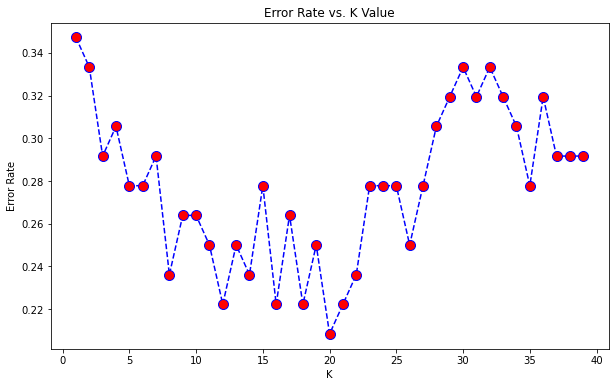

In [51]:
#how to choose value of k

error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,color = 'blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



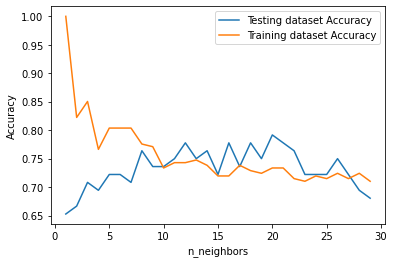

In [52]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.78      0.81      0.79        36

    accuracy                           0.79        72
   macro avg       0.79      0.79      0.79        72
weighted avg       0.79      0.79      0.79        72



In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),
                   max_iter=5000)

In [59]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=5000)

In [60]:
predictions = mlp.predict(x_test)

In [61]:
print(confusion_matrix(y_test,predictions))

[[29  8]
 [11 24]]


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        37
           1       0.75      0.69      0.72        35

    accuracy                           0.74        72
   macro avg       0.74      0.73      0.73        72
weighted avg       0.74      0.74      0.74        72

